In [231]:
import torch
import numpy as np
from matplotlib import pyplot as plt

import librosa
from librosa.core import magphase
import librosa.display

import IPython
import soundfile as sf

import IPython.display as ipd

In [232]:
myfontsize=14

In [233]:
#PARAMS
#paramfile = 'scratch/responseiveness_inst_step_then_glide.npy'
paramfile = 'scratch/responseiveness_i0.arpeggio_then_glide.npy'

sounddir='output/2021.04.26_nsynthsubset_edgepinnedH256.FTR.99.SL256.20210428/audio'
#soundfilename='responseiveness_inst_step_then_glide.3secs.120000'
soundfilename='responseiveness_i0.arpeggio_then_glide.3secs.120000'

paramNum=0
paramLabel='pitch parameter'
#---------------------------------------------------------------------------------------
soundfile = sounddir+ '/' + soundfilename +'.wav'
imageoutfile='images/' + soundfilename+'.png'
print(f"Will write png image out to {imageoutfile}")

Will write png image out to images/responseiveness_i0.arpeggio_then_glide.3secs.120000.png


numseconds in sound  file is 3.0


/home/lonce/miniconda3/envs/pytorch/lib/python3.7/site-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "
/home/lonce/miniconda3/envs/pytorch/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/lonce/miniconda3/envs/pytorch/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/lonce/miniconda3/envs/pytorch/lib/python3.7/site-packages/librosa/display.py:974: M

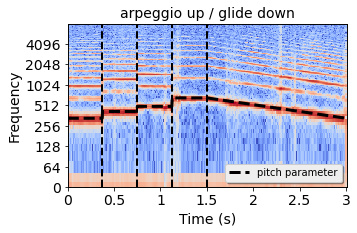

In [234]:
import math 
# First read sound file
y,sr=sf.read(soundfile)
s=librosa.stft(y,hop_length=128, n_fft=512)
d=librosa.amplitude_to_db(s)

numSeconds=len(y)/sr
print(f"numseconds in sound  file is {numSeconds}")
      
#---------------------------------------
# Next read the param  file
from numpy import load
# load array
paramdata = load(paramfile)
#datain=load('scratch/GANsynthArpeggio_basic_1000samps.npy')
numParams=len(paramdata[0,0])

numDataPoints=len(paramdata[0])
      
#---------------------------------------

# for plotting in time
t_values = np.linspace(0, numSeconds, numDataPoints) #linspace is inclusive of endpoints


fig, ax1 = plt.subplots()

#fig.suptitle('test title', fontsize=20)
ax2 = ax1.twinx()  # set up the 2nd axis

img = librosa.display.specshow(d, x_axis='s', y_axis='log', hop_length=128, sr=sr,ax=ax1)
ax1.set_title('arpeggio up / glide down', fontsize=myfontsize)
#ax1.set(title='arpeggio / spectrogram')
ax1.set_xlabel('Time (s)', fontsize = myfontsize)
ax1.set_ylabel('Frequency', fontsize = myfontsize)
#ax1.tick_params(axis='x', Labelsize= 18)


#fig.colorbar(img, ax=ax1, format="%+2.f dB")


for tick in ax1.xaxis.get_major_ticks():
                tick.label.set_fontsize(myfontsize)
for tick in ax1.yaxis.get_major_ticks():
                tick.label.set_fontsize(myfontsize)        


ax2.axes.yaxis.set_visible(False)
        
        
n=1+math.log2((329)/64)  #midinote 64 has frequency 329, units are octaves re 64
#for pnum in range(1,numParams) :
ax2.plot(t_values, n+paramdata[0,:,paramNum], label=paramLabel, color='black', linestyle="--",linewidth=3)
ax2.set_ylim( bottom=0, top=8)
#ax2.ylim([0, 1])

ax2.axvline(x=1.5/4, linestyle="--", color='black', linewidth=2)
ax2.axvline(x=2*1.5/4, linestyle="--", color='black' , linewidth=2)
ax2.axvline(x=3*1.5/4, linestyle="--", color='black' , linewidth=2)
ax2.axvline(x=4*1.5/4, linestyle="--", color='black' , linewidth=2)

#legend = ax2.legend(loc='upper center', shadow=True, fontsize='x-large')
#legend=ax2.legend(loc='upper right', frameon=False, prop={'size': 16})
#legend.get_frame().set_facecolor('#CCCCCC')

legend = ax2.legend(loc='lower right', shadow=True, fontsize='medium')
# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#EEEEEE')

fig.set_size_inches(5, 3)


arpglide22k=librosa.resample(y, sr, 22050)
ipd.Audio(arpglide22k, rate=22050, autoplay=False) # load a NumPy array



In [235]:
import os
os.makedirs(os.path.dirname(imageoutfile), exist_ok=True)
fig.savefig(imageoutfile, dpi=100)

########################################################################

In [236]:
#PARAMS
paramfile = 'scratch/responseiveness_inst_step_then_glide.npy'
#paramfile = 'scratch/responseiveness_i0.arpeggio_then_glide.npy'

#sounddir='output/2021.04.26_nsynthsubset_edgepinnedH256.FTR.99.SL256.20210428/audio'
soundfilename='responseiveness_inst_step_then_glide.3secs.120000'
#soundfilename='responseiveness_i0.arpeggio_then_glide.3secs.120000'

paramNum=1   
paramLabel='instrument ID parameter\n in range [0,1]'
#---------------------------------------------------------------------------------------
soundfile = sounddir+ '/' + soundfilename +'.wav'
imageoutfile='images/' + soundfilename+'.png'
print(f"Will write png image out to {imageoutfile}")

Will write png image out to images/responseiveness_inst_step_then_glide.3secs.120000.png


numseconds in sound  file is 3.0


/home/lonce/miniconda3/envs/pytorch/lib/python3.7/site-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "
/home/lonce/miniconda3/envs/pytorch/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/lonce/miniconda3/envs/pytorch/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/lonce/miniconda3/envs/pytorch/lib/python3.7/site-packages/librosa/display.py:974: M

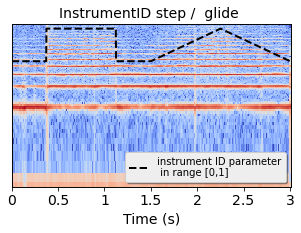

In [237]:
import math 
# First read sound file
y,sr=sf.read(soundfile)
s=librosa.stft(y,hop_length=128, n_fft=512)
d=librosa.amplitude_to_db(s)

numSeconds=len(y)/sr
print(f"numseconds in sound  file is {numSeconds}")
      
#---------------------------------------
# Next read the param  file
from numpy import load
# load array
paramdata = load(paramfile)
#datain=load('scratch/GANsynthArpeggio_basic_1000samps.npy')
numParams=len(paramdata[0,0])

numDataPoints=len(paramdata[0])
      
#---------------------------------------

# for plotting in time
t_values = np.linspace(0, numSeconds, numDataPoints) #linspace is inclusive of endpoints


fig, ax1 = plt.subplots()

#fig.suptitle('test title', fontsize=20)
ax2 = ax1.twinx()  # set up the 2nd axis

img = librosa.display.specshow(d, x_axis='s', y_axis='log', hop_length=128, sr=sr,ax=ax1)
ax1.set_title('InstrumentID step /  glide ', fontsize=myfontsize)
#ax1.set(title='arpeggio / spectrogram')
ax1.set_xlabel('Time (s)', fontsize = myfontsize)
ax1.set_ylabel('Frequency', fontsize = myfontsize)
#ax1.tick_params(axis='x', Labelsize= 18)

ax1.axes.yaxis.set_visible(False)

#fig.colorbar(img, ax=ax1, format="%+2.f dB")


for tick in ax1.xaxis.get_major_ticks():
                tick.label.set_fontsize(myfontsize)
for tick in ax1.yaxis.get_major_ticks():
                tick.label.set_fontsize(myfontsize)        

ax2.axes.yaxis.set_visible(False)
        
        
#for pnum in range(1,numParams) :
ax2.plot(t_values, .77+.2*paramdata[0,:,paramNum], label=paramLabel, color='black', linestyle="--",linewidth=2)
ax2.set_ylim( bottom=0, top=1)
#ax2.ylim([0, 1])

#ax2.axvline(x=1.5/4, linestyle="--", color='black')
#ax2.axvline(x=2*1.5/4, linestyle="--", color='black')
#ax2.axvline(x=3*1.5/4, linestyle="--", color='black')
#ax2.axvline(x=4*1.5/4, linestyle="--", color='black')



legend = ax2.legend(loc='lower right', shadow=True, fontsize='medium')
# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#EEEEEE')

fig.set_size_inches(5, 3)


inststepglide22k=librosa.resample(y, sr, 22050)
ipd.Audio(inststepglide22k, rate=22050, autoplay=False) # load a NumPy array



In [238]:
paramdata

array([[[0.58333333, 0.        ],
        [0.58333333, 0.        ],
        [0.58333333, 0.        ],
        ...,
        [0.58333333, 0.012     ],
        [0.58333333, 0.008     ],
        [0.58333333, 0.004     ]]])

In [239]:
import os
os.makedirs(os.path.dirname(imageoutfile), exist_ok=True)
fig.savefig(imageoutfile, dpi=100)

#############################################################

In [240]:
#PARAMS
#paramfile = 'scratch/responseiveness_inst_step_then_glide.npy'
paramfile = 'scratch/rhapsody_1000samps.npy'

sounddir='output/2021.04.26_nsynthsubset_edgepinnedH256.FTR.99.SL256.20210428/audio'
#soundfilename='responseiveness_inst_step_then_glide.3secs.120000'
soundfilename='rhapsody.H256.FTR.99.SL256.120000'


pitchParamNum=0
instParamNum=1

pitchParamLabel='pitch parameter'
instParamLabel='instrument parameter'

#---------------------------------------------------------------------------------------
soundfile = sounddir+ '/' + soundfilename +'.wav'
imageoutfile='images/' + soundfilename+'.png'
print(f"Will write png image out to {imageoutfile}")

Will write png image out to images/rhapsody.H256.FTR.99.SL256.120000.png


numseconds in sound  file is 8.0


/home/lonce/miniconda3/envs/pytorch/lib/python3.7/site-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "
/home/lonce/miniconda3/envs/pytorch/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/lonce/miniconda3/envs/pytorch/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/lonce/miniconda3/envs/pytorch/lib/python3.7/site-packages/librosa/display.py:974: M

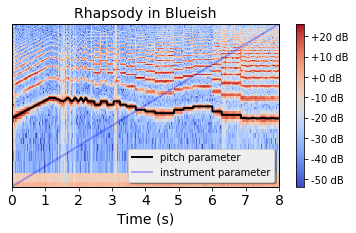

In [241]:
# First read sound file
y,sr=sf.read(soundfile)
s=librosa.stft(y,hop_length=128, n_fft=512)
d=librosa.amplitude_to_db(s)

numSeconds=len(y)/sr
print(f"numseconds in sound  file is {numSeconds}")
      
#---------------------------------------
# Next read the param  file
from numpy import load
# load array
paramdata = load(paramfile)
#datain=load('scratch/GANsynthArpeggio_basic_1000samps.npy')
numParams=len(paramdata[0,0])

numDataPoints=len(paramdata[0])
      
#---------------------------------------

# for plotting in time
t_values = np.linspace(0, numSeconds, numDataPoints) #linspace is inclusive of endpoints


fig, ax1 = plt.subplots()

#fig.suptitle('test title', fontsize=20)
ax2 = ax1.twinx()  # set up the 2nd axis

ax3 = ax1.twinx()  # set up the 2nd axis

img = librosa.display.specshow(d, x_axis='s', y_axis='log', hop_length=128, sr=sr,ax=ax1)
ax1.set_title('Rhapsody in Blueish', fontsize=myfontsize)
#ax1.set(title='arpeggio / spectrogram')
ax1.set_xlabel('Time (s)', fontsize = myfontsize)
ax1.set_ylabel('Frequency', fontsize = myfontsize)
#ax1.tick_params(axis='x', Labelsize= 18)
fig.colorbar(img, ax=ax1, format="%+2.f dB")


for tick in ax1.xaxis.get_major_ticks():
                tick.label.set_fontsize(myfontsize)
for tick in ax1.yaxis.get_major_ticks():
                tick.label.set_fontsize(myfontsize)        

ax1.axes.yaxis.set_visible(False)
        
ax2.axes.yaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)


n=1+math.log2((329)/64)  #midinote 64 has frequency 329, units are octaves re 64
#for pnum in range(1,numParams) :
ax2.plot(t_values, n+paramdata[0,:,pitchParamNum], label=pitchParamLabel, color='black', linewidth=2)
ax2.set_ylim( bottom=0, top=8)
#ax2.ylim([0, 1])

ax2.plot(t_values, 8*paramdata[0,:,instParamNum], label=instParamLabel, color='blue', linewidth=2, alpha=.3)

#ax2.axvline(x=1.5/4, linestyle="--", color='black', linewidth=2)
#ax2.axvline(x=2*1.5/4, linestyle="--", color='black' , linewidth=2)
#ax2.axvline(x=3*1.5/4, linestyle="--", color='black' , linewidth=2)
#ax2.axvline(x=4*1.5/4, linestyle="--", color='black' , linewidth=2)

#legend = ax2.legend(loc='upper center', shadow=True, fontsize='x-large')
#legend=ax2.legend(loc='upper right', frameon=False, prop={'size': 16})
#legend.get_frame().set_facecolor('#CCCCCC')

legend = ax2.legend(loc='lower right', shadow=True, fontsize='medium')
# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#EEEEEE')

fig.set_size_inches(6, 3)

rhapsody22k=librosa.resample(y, sr, 22050)
ipd.Audio(rhapsody22k, rate=22050, autoplay=False) # load a NumPy array
